In [1]:
from datascience import *
path_data = '../assets/data/'
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# 9.0 Randomness

In [2]:
two_groups = make_array('treatment', 'control')
np.random.choice(two_groups)

'treatment'

다음은 50% 확률로 treatement 또는 control을 선택한다.

In [3]:
np.random.choice(two_groups, 10)

array(['control', 'treatment', 'control', 'treatment', 'treatment',
       'treatment', 'control', 'control', 'treatment', 'treatment'],
      dtype='<U9')

시행 횟수를 늘려 경우를 따질 수도 있다.

# 9.1 Conditional Statements (조건문)

In [4]:
def sign(x):
    
    if x > 0:
        return 'Positive'

In [5]:
sign(3)

'Positive'

sign 함수는 다음과 같이 양수일 경우 positive를 반환한다.

In [6]:
sign(-3)

하지만 음수에 대해선 리턴되지 않으므로 반환값이 없다.

In [7]:
def sign(x):
    
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'

In [8]:
sign(-3)

'Negative'

In [9]:
def sign(x):
    
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'
    
    elif x == 0:
        return 'Neither positive nor negative'

In [10]:
sign(0)

'Neither positive nor negative'

In [11]:
def sign(x):
    
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'
    
    else:
        return 'Neither positive nor negative'

In [12]:
sign(0)

'Neither positive nor negative'

## 예제 : 죽음 위 베팅

In [13]:
def one_bet(x):
    """Returns my net gain if the die shows x spots"""
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [14]:
one_bet(1), one_bet(2), one_bet(3), one_bet (4), one_bet(5), one_bet(6)

(-1, -1, 0, 0, 1, 1)

In [15]:
one_bet(np.random.choice(np.arange(1, 7)))

1

one_bet은 1 ~ 6 사이의 수를 입력 받았을때 각각 -1, -1, 0, 0, 1, 1 을 반환하는 함수이다.

# 9.2 Iteration (반복)

In [16]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

1 ~ 6 사이의 수를 랜덤하게 하나 선택하고, 선택한 숫자에 따라 -1, 0, 1을 반환하는 함수가 있다.

In [25]:
bet_on_one_roll()

-1

In [28]:
for i in np.arange(5):
    print(bet_on_one_roll())

0
-1
1
1
-1


### 배열 보강

In [29]:
pets = make_array('Cat', 'Dog')
np.append(pets, 'Another Pet')

array(['Cat', 'Dog', 'Another Pet'],
      dtype='<U11')

pets에 Another Pet을 추가

In [30]:
pets

array(['Cat', 'Dog'],
      dtype='<U3')

하지만 pets에 적용되지 않음

In [31]:
pets = np.append(pets, 'Another Pet')
pets

array(['Cat', 'Dog', 'Another Pet'],
      dtype='<U11')

다음과 같이 작성

### 예제 : 5 Rolls 베팅

In [32]:
outcomes = make_array()

for i in np.arange(5):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
outcomes

array([-1.,  1.,  0.,  1.,  0.])

반복문을 이용하여 5 Rolls 의 결과를 구할 수 있다.

In [33]:
outcomes = make_array()

i = np.arange(5).item(0)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(1)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(2)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(3)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5).item(4)
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

outcomes

array([ 1., -1.,  1.,  0.,  1.])

다음은 반복문 실행 과정

In [34]:
np.count_nonzero(outcomes)

4

nonzero를 통해 0이 아닌 값들을 구할 수 있다.

### 예제 : 300 Rolls 베팅

In [35]:
outcomes = make_array()

for i in np.arange(300):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)

In [36]:
len(outcomes)

300

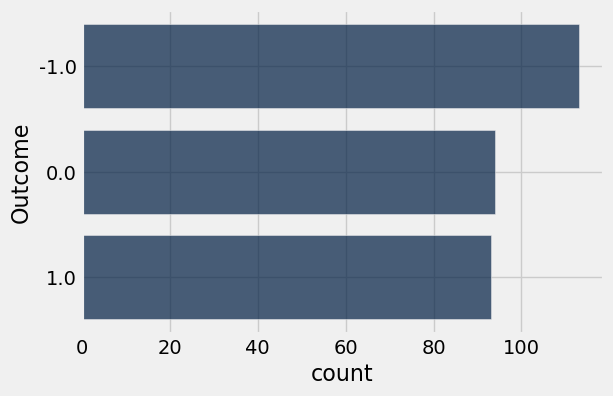

In [37]:
outcome_table = Table().with_column('Outcome', outcomes)
outcome_table.group('Outcome').barh(0)
plots.show()

다음은 300번 반복한 결괴이다. 전체적으로 비슷한 그림을 띈다.

# 9.3 Simulation

### 과정
1. 무엇을 시뮬레이션 할 것인가
2. 한 값을 시뮬레이션 한다.
3. 반복 횟수 지정
4. 여러 값 시뮬레이션

### 예시 : 100번 던져서 Head의 수

코인을 던지면 head와 tail이 나오는데, 코인을 100번 던졌을 때 head가 나온 횟수를 구한다.

1. 무엇을 시뮬레이션 할 것인가
    - 100번 던져서 head가 나오는 수를 구한다.
2. 한 값 시뮬레이션
    - 코인을 100번 던진다. 그리고 head의 수를 센다.

In [38]:
coin = make_array('Heads', 'Tails')

In [ ]:
ten_tosses = np.random.choice(coin, 10)
ten_tosses

array(['Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails',
       'Heads', 'Tails', 'Heads'],
      dtype='<U5')

In [40]:
np.count_nonzero(ten_tosses == 'Heads')

4

우리의 목표는 100개 중 head의 수를 구하는 것. 따라서 100번 시뮬레이션 해준다.

In [44]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'Heads')
num_heads

50

In [45]:
def one_simulated_value():
    outcomes = np.random.choice(coin, 100)
    return np.count_nonzero(outcomes == 'Heads')

다음과 같이 함수로써 정의할 수 있다.

3. 반복횟수 설정하기
- 20000번

4. 여러 값 시뮬레이션 하기

In [46]:
num_repetitions = 20000  # number of repetitions

heads = make_array() # empty collection array

for i in np.arange(num_repetitions):   # repeat the process num_repetitions times
    new_value = one_simulated_value()  # simulate one value using the function defined
    heads = np.append(heads, new_value) # augment the collection array with the simulated value

# That's it! The simulation is done.

In [47]:
len(heads)

20000

In [48]:
simulation_results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Number of Heads', heads
)

In [50]:
simulation_results.show(10)

Repetition,Number of Heads
1,49
2,58
3,54
4,51
5,43
6,52
7,42
8,55
9,58
10,50


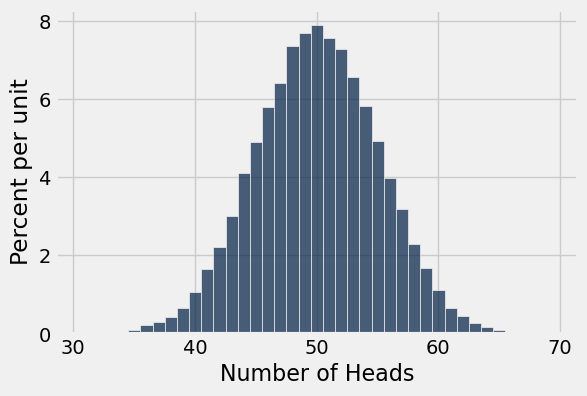

In [51]:
simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))
plots.show()

# 9.4 몬티 홀 문제

3개의 문이 있고 각 문 뒤에는 염소, 염소, 차가 있다. 개방되지 않은 문 3개 중 하나를 선택하고 선택되지 않은 두 문중 염소가 들어있는 문을 플레이어에게 보여준다. 이후 플레이어는 처음 선택한 문과 개방되지 않은 하나의 문을 두고 선택을 유지할지, 번복할지 선택할 수 있다.

이때 플레이어는 이 선택을 유지하는 것과 번복 하는 것 중 어느 것이 차를 얻을 확률이 더 높을 것인가?

In [56]:
goats = make_array('first goat', 'second goat')

In [59]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [55]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [60]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [67]:
monty_hall_game()

['first goat', 'second goat', 'car']

In [68]:
# empty collection table
games = Table(['Guess', 'Revealed', 'Remaining'])

# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    games.append(monty_hall_game())

In [69]:
games.show(5)

Guess,Revealed,Remaining
car,first goat,second goat
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car


In [70]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3317
first goat,3278
second goat,3405


In [71]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6683
first goat,1642
second goat,1675


In [72]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3317,6683
first goat,3278,1642
second goat,3405,1675


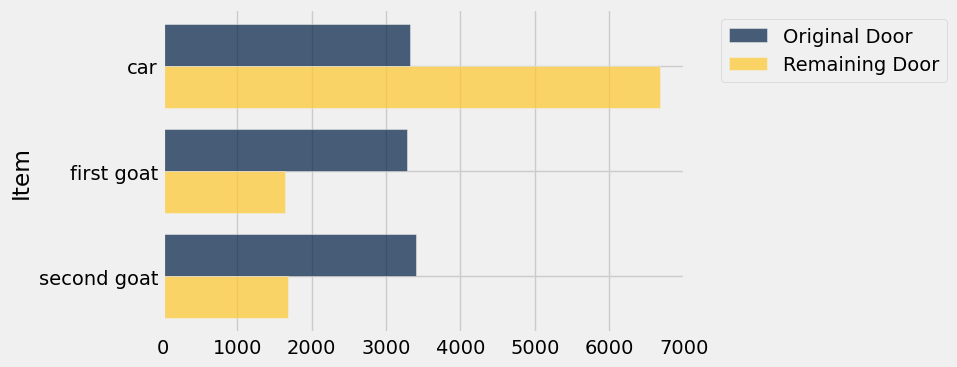

In [73]:
combined.barh(0)
plots.show()